### R-DBSCAN-fps&dbscan

使用R语言中`fpc`和`dbscan`库来完成`DBSCAN`算法的调用。参考[sthda](http://www.sthda.com/english/wiki/wiki.php?id_contents=7940)

The function `dbscan()`(in fpc package) or `dbscan()`(in dbscan package) can be used.

#### Intro-Poor K-means:-)

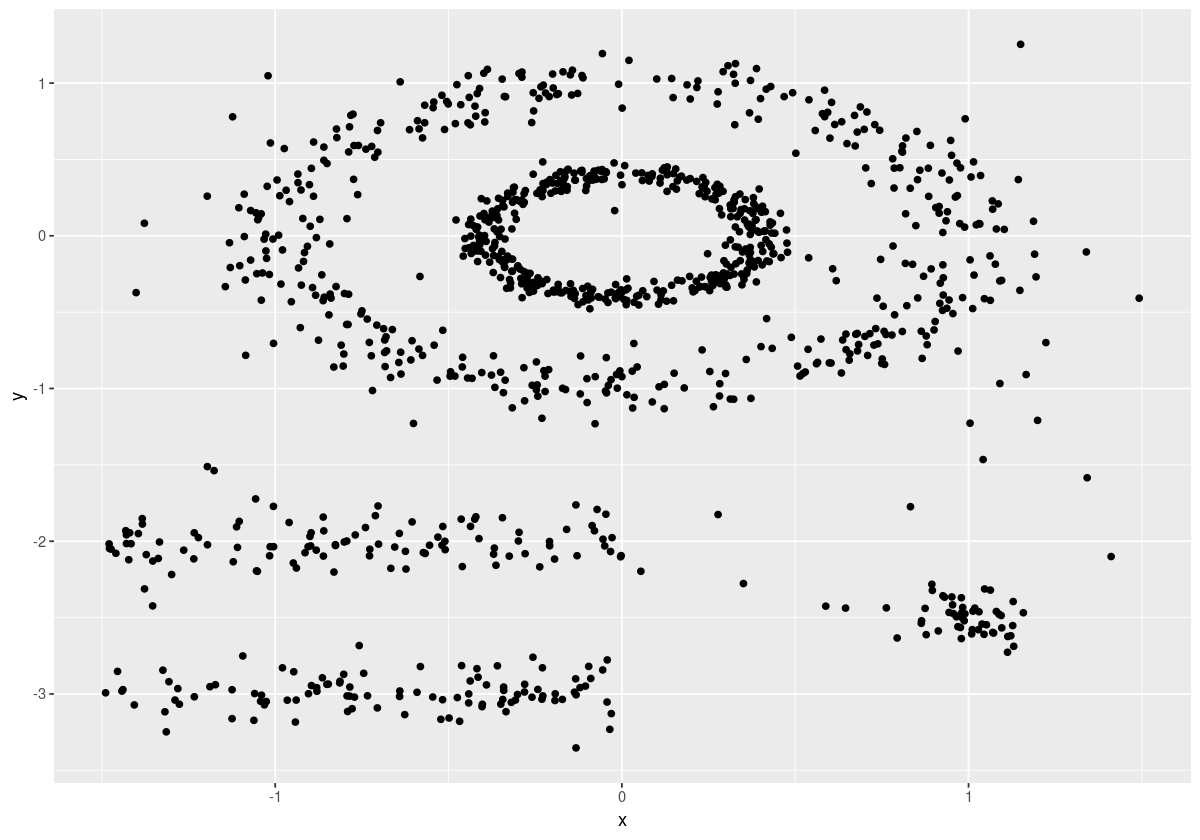

In [16]:
library(factoextra)
data("multishapes")
df <- multishapes[, 1:2]
ggplot(df, aes(x=df[, 1], y=df[, 2])) + 
    geom_point() + 
    xlab("x") + 
    ylab("y")

可以看到一共5个明显的簇，包括两个嵌套的椭圆，两条直线以及一个集聚点。

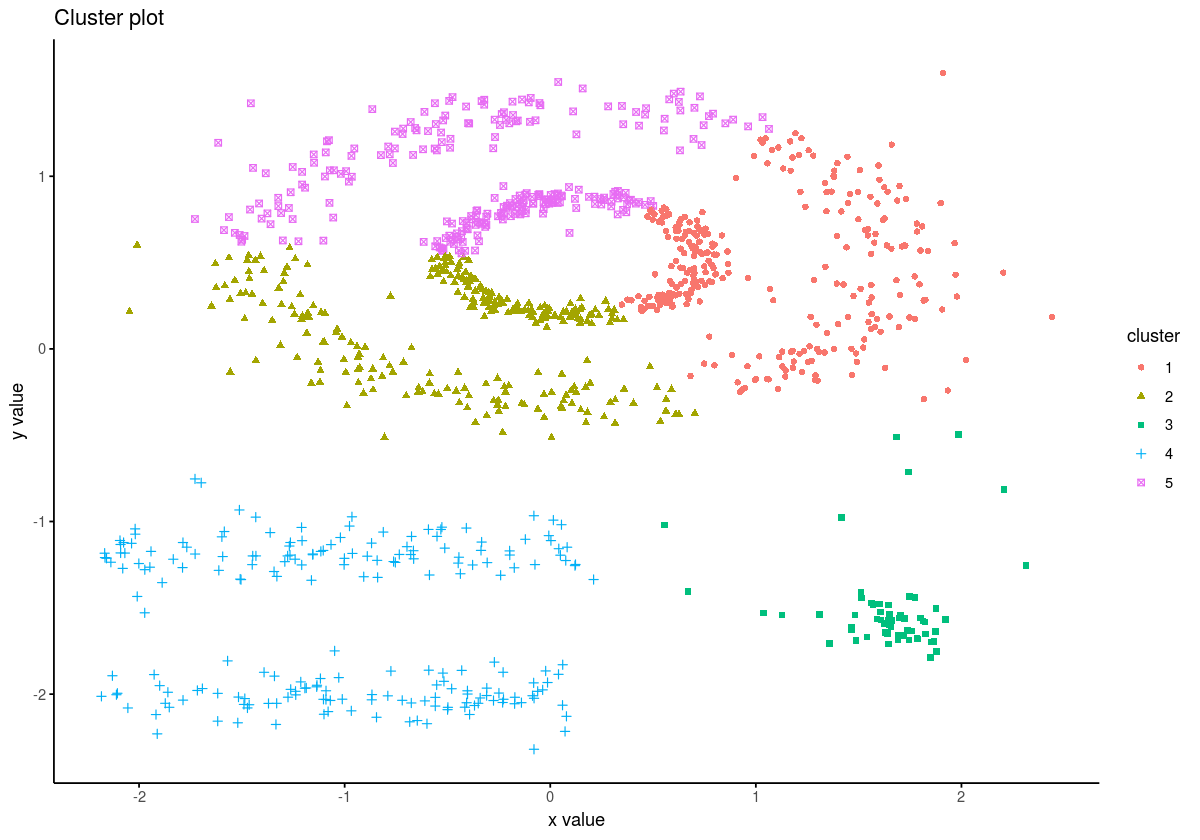

In [17]:
set.seed(123)
km.res <- kmeans(df, 5, nstart = 25)
options(repr.plot.width=10, repr.plot.hight=6)
fviz_cluster(km.res, df, geom = "point",
             ellipse=FALSE, show.clust.cent=FALSE,
             pallete = "jco", ggtheme=theme_classic())

K-means给出的聚类结果十分糟糕，因其只能找到`spherical-shaped cluster`

#### DBSCAN in R

In [19]:
# Load the data 
data("multishapes", package = "factoextra")
df <- multishapes[, 1:2]
head(df, 3)

x,y
-0.8037393,-0.8530526
0.8528507,0.3676184
0.9271795,-0.2749024


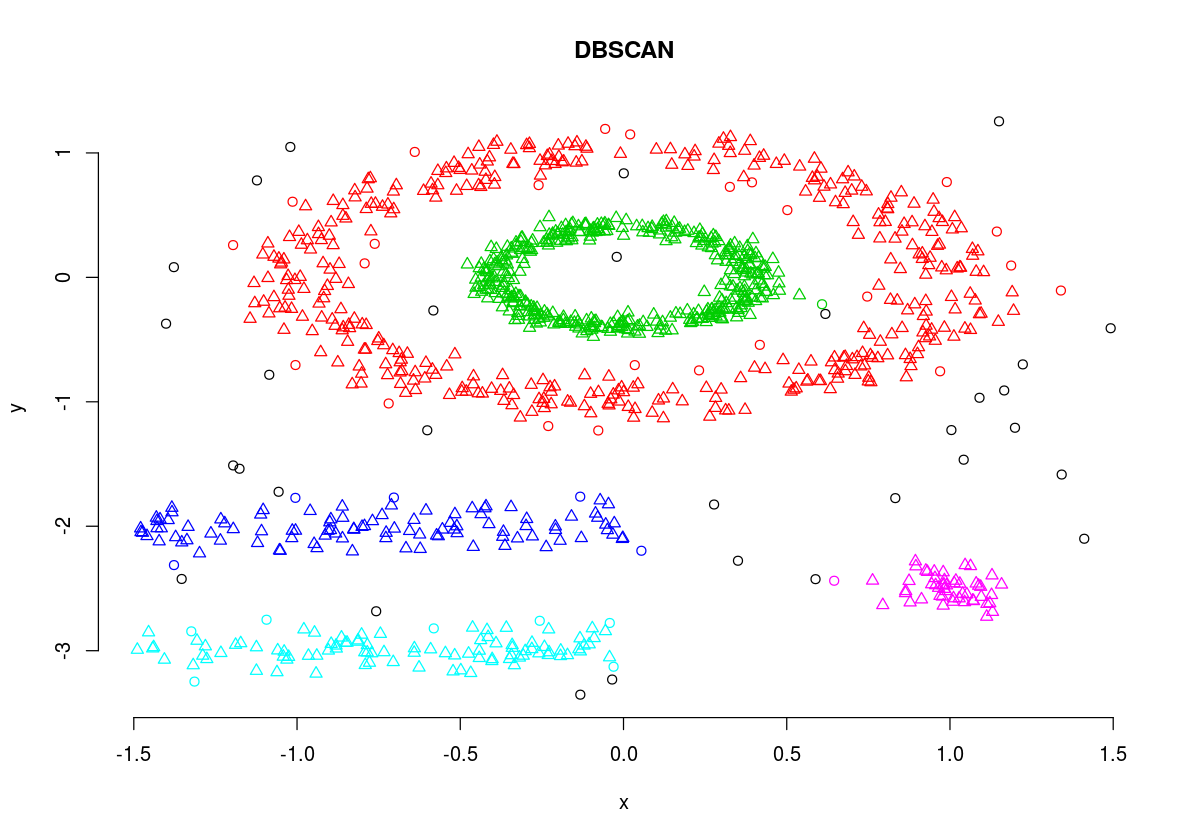

In [20]:
library("fpc")
# Compute DBSCAN using fpc package
set.seed(123)
db <- fpc::dbscan(df, eps = 0.15, MinPts = 5)
# Plot DBSCAN results
plot(db, df, main = "DBSCAN", frame = FALSE)

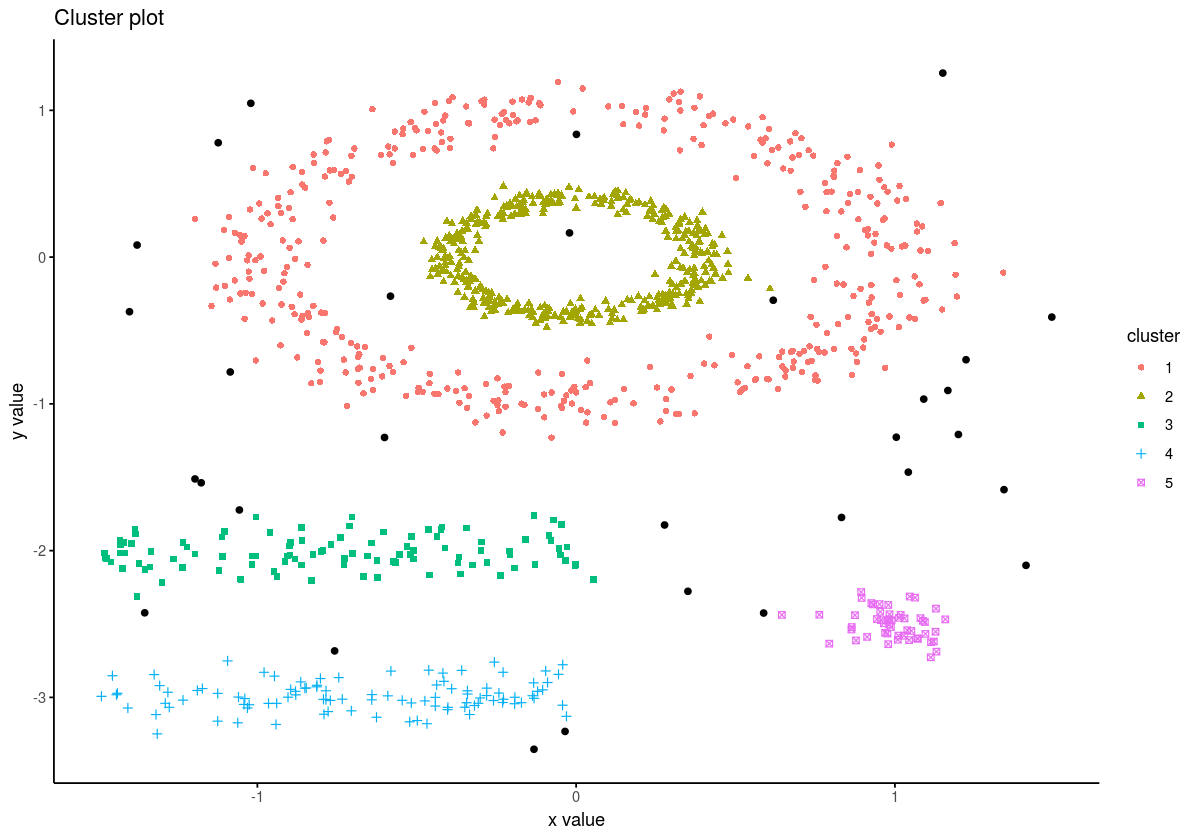

In [23]:
library("factoextra")
fviz_cluster(db, df, stand = FALSE, 
             ellipse = FALSE, show.clust.cent=FALSE,
             geom = "point", pallete="jco",
            ggtheme=theme_classic())

注意上图中黑点代表`noise data`

In [24]:
db

dbscan Pts=1100 MinPts=5 eps=0.15
        0   1   2   3  4  5
border 31  24   1   5  7  1
seed    0 386 404  99 92 50
total  31 410 405 104 99 51

输出中的`0`列代表`outliers`

#### Method for determining the optimal eps value

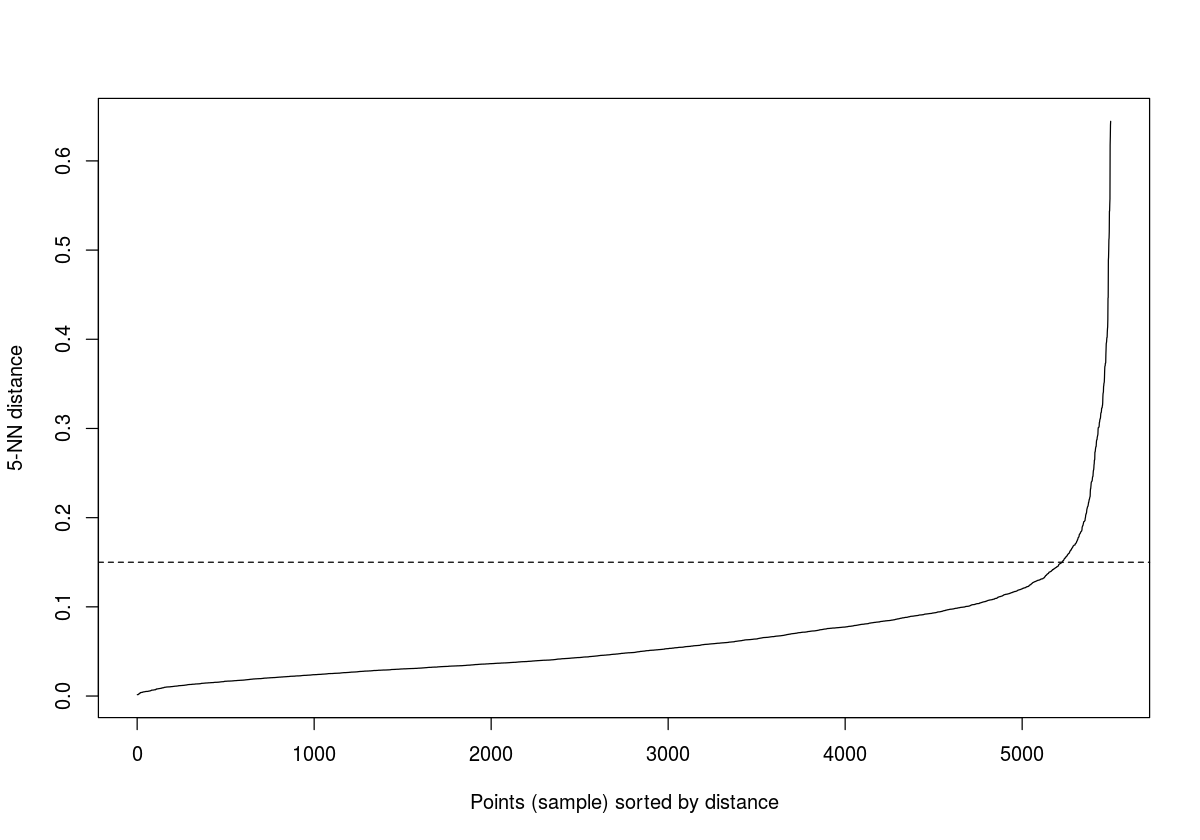

In [27]:
dbscan::kNNdistplot(df, k =  5)
abline(h = 0.15, lty = 2)

#### Cluster predictions with DBSCAN algorithm

`predict(object, data, newdata = NULL, predict.max=1000, ...)`

In [31]:
predict(db, multishapes, multishapes[42, ])

[1] 1

#### Application of DBSCAN on a real data

In [32]:
# Load the data
data("iris")
iris <- as.matrix(iris[, 1:4])
head(iris, 3)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2


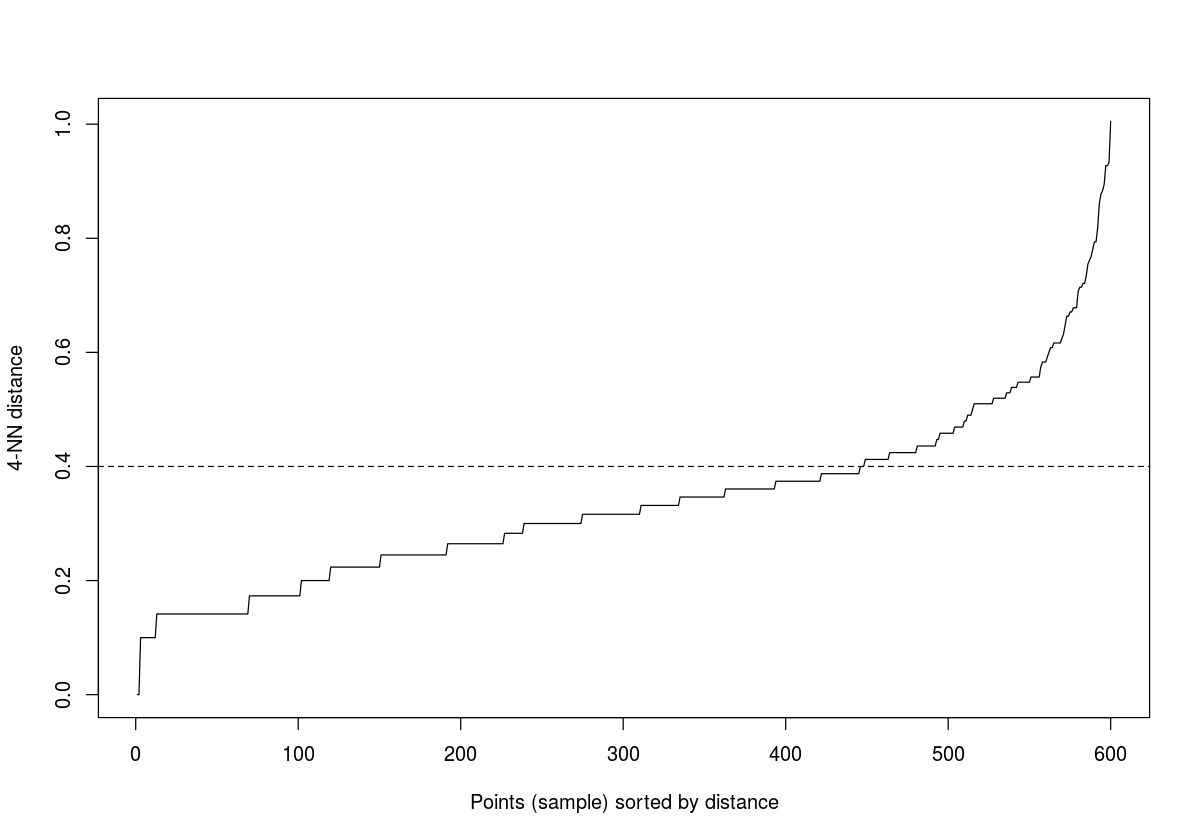

In [33]:
dbscan::kNNdistplot(iris, k =  4)
abline(h = 0.4, lty = 2)

In [34]:
set.seed(123)
# fpc package
res.fpc <- fpc::dbscan(iris, eps = 0.4, MinPts = 4)
# dbscan package
res.db <- dbscan::dbscan(iris, 0.4, 4)

In [42]:
# Make sure that both version produce the same results
all(res.fpc$cluster == res.db$cluster)

[1] TRUE

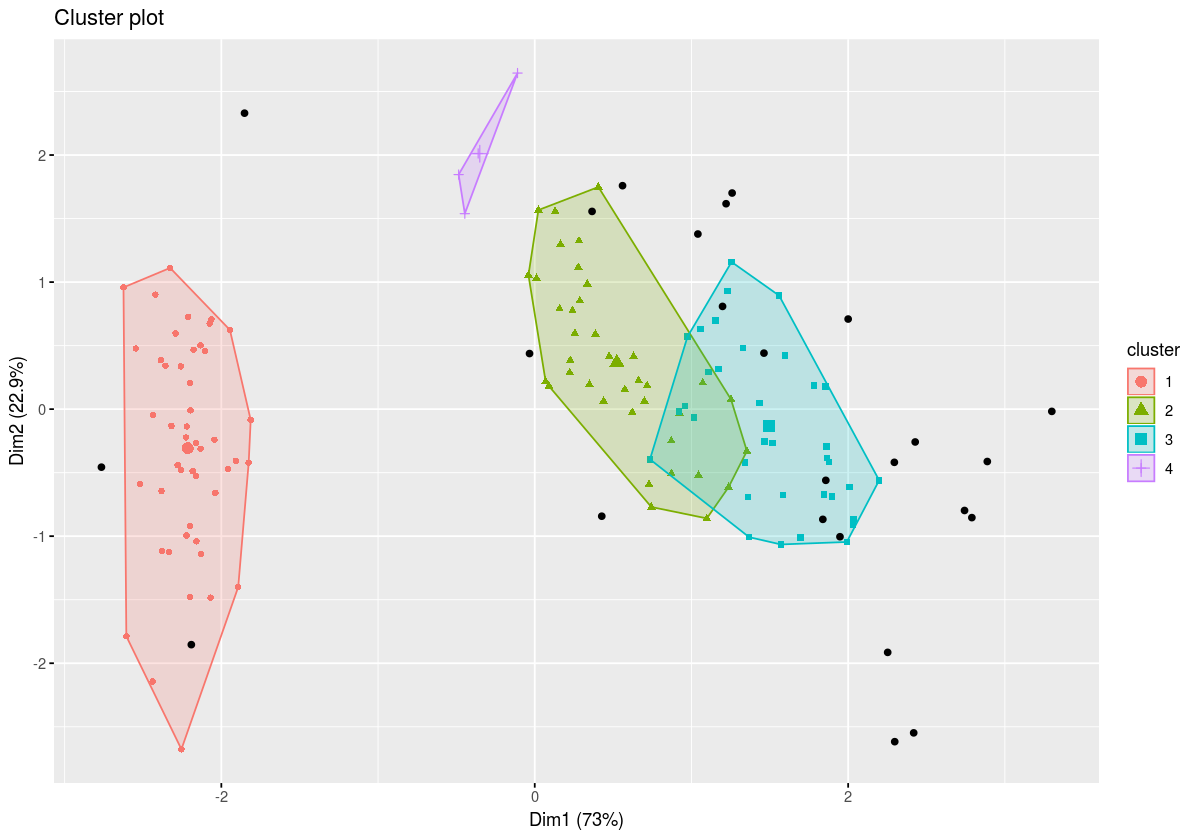

In [43]:
fviz_cluster(res.fpc, iris, geom = "point")